In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def GetMin(index : int, arr : list[int]):
    '''
    Gets the deppest point in "mountain"
    Parameters:
        index : int - Starting index point.
        arr : list[int] - The list of elements.
    Returns:
        minElement : int - The minimum element.
        minIndex : int - The index of the minimum element.
    '''
    minElement = None
    minIndex = None

    # Looking for the first element that is less than the next one
    for i in range(index, len(arr)):
        if i + 1 == len(arr):
            break

        if arr[i] < arr[i + 1]:
            # If we found one, return it
            minElement = arr[i]
            minIndex = i
            return minElement, minIndex

    return minElement, minIndex

In [3]:
def GetMostRight(index : int, arr : list[int]):
    '''
    Gets right "boundary" in "mountain"
    Parameters:
        index : int - Starting index point.
        arr : list[int] - The list of elements.
    Returns:
        mostRighElement : int - The right "boundary".
        int - The index of the right "boundary".
    '''
    mostRighElement = None
    # Looking for the first element that is greater than the next one
    for i in range(index, len(arr)):
        if i + 1 == len(arr):
            break
        # If we found one, return it
        if arr[i] > arr[i + 1]:
            mostRighElement = arr[i]
            return mostRighElement, i

    # If we didn't find any, return the last element
    mostRighElement = arr[len(arr) - 1]
    return mostRighElement, (len(arr) - 1)

In [4]:
def CalculateDepth(leftElement : int, rightElement : int, min : int) -> int:
    '''
    Calculates the depth of the "lake" in "mountain"
    Parameters:
        leftElement : int - The left "boundary of mountain".
        rightElement : int - The right "boundary of mountain".
        min : int - The deepest point of "mountain".
    Returns:
        depth : int - The depth of the "lake".
    '''
    depth = 0
    
    # Calculate the depth from the lesser "boundary" to the deepest point
    if leftElement < rightElement:
        depth = leftElement - min 
    else:
        depth = rightElement - min

    return depth

In [6]:
def CalculateDeepestLake(arr : list[int]):
    '''
    Calculates the deepest "lake" in "mountains"
    Parameters:
        arr : list[int] - The sequence of 20 random integer values.
    Returns:
        depth : int - The depth of the "lake".
        mostLeftIndex : int - The index of the left "boundary".
        mostRightIndex : int - The index of the right "boundary".
    '''
    # Initialize variables
    i : int = 0 
    min : int = None # The deepest point in the "mountain"
    minIndex = None 
    mostLeft = arr[0] # The left "boundary" of the "mountain"
    mostRight = arr[0] # The right "boundary" of the "mountain"
    mostLeftIndex = 0
    mostRightIndex = 0
    depthList : list[int] = [] # List of depths
    indexList = [] # List of indexes of the "boundaries"

    while i < len(arr):
        if i + 1 == len(arr):
            break

        # Update the left "boundary" of the "mountain"
        mostLeft = mostRight
        mostLeftIndex = mostRightIndex

        # Get the deepest point in the "mountain"
        (min, minIndex) = GetMin(i, arr)
        # If there are no "mountain", break the loop
        if min is None:
            break
        # If the deepest point is the same as the left "boundary", there is no "lake"
        elif min == mostLeft:
            (mostRight, mostRightIndex) = GetMostRight(i, arr)
            i = mostRightIndex # Update the index
            continue
        else:
            # Get the right "boundary" of the "mountain"
            (mostRight, mostRightIndex) = GetMostRight(minIndex, arr)
            i = mostRightIndex # Update the index

        # Calculate the depth of the "lake" and store indexes of the "mountain boundaries"
        depthList.append(CalculateDepth(mostLeft, mostRight, min))
        indexList.append((mostLeftIndex, mostRightIndex))

    # If there are no "lakes", return 0
    if len(depthList) == 0:
        return 0, None, None

    depth = max(depthList)
    (mostLeftIndex, mostRightIndex) = indexList[depthList.index(depth)]
    return depth, mostLeftIndex, mostRightIndex

[88 26 71 56 34 93  4 53 87 97 23 18 54 48 78 40 70 89  4 59]
The deepest lake in: [93  4 53 87 97]
Depth: 89


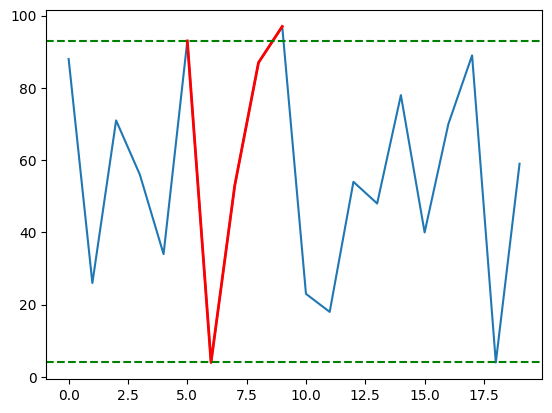

In [7]:
np.random.seed(2023)
arr = np.random.randint(1,100,20)
print(arr)

(depth, leftElement, rightElement) = CalculateDeepestLake(arr)

plt.plot(arr)
if leftElement is None or rightElement is None:
    print("There are no lakes")
else:
    plt.plot(range(leftElement, rightElement + 1), arr[leftElement:rightElement + 1], c = "red", linewidth = 2)
    plt.axhline(y=min(arr[leftElement], arr[rightElement]), c = "green", linestyle = "dashed")
    plt.axhline(y=min(arr[leftElement:rightElement + 1]), c = "green", linestyle = "dashed")
    print("The deepest lake in: " + str(arr[leftElement:rightElement + 1]))
    print("Depth: " + str(depth))